In [9]:
import math
import numpy as np
import scipy.io.wavfile
import librosa
import matplotlib.pyplot as plt

sampling_rate: 16000, frequency: 100, duration: 7.0008125


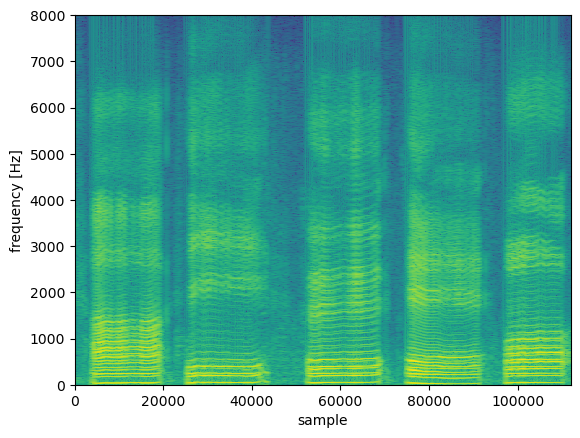

In [20]:
def generate_sinusoid(sampling_rate, frequency, duration):
  print(f'sampling_rate: {sampling_rate}, frequency: {frequency}, duration: {duration}')
  sampling_interval = 1.0 / sampling_rate
  t = np.arange(sampling_rate * duration) * sampling_interval
  waveform = np.sin(2.0 * math.pi * frequency * t)
  return waveform

def spectrogram(waveform, size_frame, size_shift):
  spectrogram = []
  hamming_window = np.hamming(size_frame)

  for i in np.arange(0, len(waveform) - size_frame, size_shift):
    idx = int(i)
    x_frame = waveform[idx: idx + size_frame]

    # 窓掛けしたデータをFFT
    fft_spec = np.fft.rfft(x_frame * hamming_window)

    # 振幅スペクトルを対数化
    fft_log_abs_spec = np.log(np.abs(fft_spec))

    # 配列に保存
    spectrogram.append(fft_log_abs_spec)
  return spectrogram


def voice_change(waveform, sampling_rate, frequency):
  duration = len(waveform)
  sin_wave = generate_sinusoid(sampling_rate, frequency, duration / sampling_rate)
  sin_wave = sin_wave * 0.9
  return waveform * sin_wave

def export_wav(filename, sampling_rate, waveform):
  waveform = np.int16(waveform * 32767.0)
  scipy.io.wavfile.write(filename, sampling_rate, waveform)

SR = 16000
x, _ = librosa.load('audio/aiueo-long.wav', sr=SR)
FREQ = 100
SIZE_FRAME = 2048
SHIFT_SIZE = 16000 / 100  # 10 msec
x_changed = voice_change(x, SR, FREQ)
spec = spectrogram(x_changed, SIZE_FRAME, SHIFT_SIZE)

fig = plt.figure()
plt.xlabel('sample')
plt.ylabel('frequency [Hz]')
plt.imshow(
    np.flipud(np.array(spec).T),
    extent=[0, len(x), 0, SR / 2],
    aspect='auto',
    interpolation='nearest'
)
fig.savefig(f'plot/voice_change/aiueo-long-{FREQ}.png')
export_wav(f'audio/voice_change/aiueo-long-{FREQ}.wav', SR, x_changed)